# Telecom's Churn Dataset - Predict behavior to retain customers

<img style="display: block; margin-left: auto; margin-right: auto;" 
src="images/churn.jpeg" alt="Churn" width="800" height="200" />


https://www.kaggle.com/mnassrib/telecom-churn-datasets

#### Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

#### Content
The Orange Telecom's Churn Dataset, which consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription, will be used to develop predictive models. Two datasets are made available here: The churn-80 and churn-20 datasets can be downloaded.

The two sets are from the same batch, but have been split by an 80/20 ratio. As more data is often desirable for developing ML models, let's use the larger set (that is, churn-80) for training and cross-validation purposes, and the smaller set (that is, churn-20) for final testing and model performance evaluation.

#### Inspiration
To explore this type of models and learn more about the subject.

#### About this file
Telecom Churn Datasets

Each row represents a customer; each column contains customer’s attributes. The datasets have the following attributes or features:

<ul>
<li>State: string -  Estado</li>
<li>Account length: integer</li>
<li>Area code: integer - Código de Area</li>
<li>International plan: string - Tem plano internacional</li>
<li>Voice mail plan: string - Tem plano de voicemail</li>
<li>Number vmail messages: integer</li>
<li>Total day minutes: double</li>
<li>Total day calls: integer</li>
<li>Total day charge: double</li>
<li>Total eve minutes: double</li>
<li>Total eve calls: integer</li>
<li>Total eve charge: double</li>
<li>Total night minutes: double</li>
<li>Total night calls: integer</li>
<li>Total night charge: double</li>
<li>Total intl minutes: double</li>
<li>Total intl calls: integer</li>
<li>Total intl charge: double</li>
<li>Customer service calls: integer</li>
<li>Churn: string</li>
</ul>

The "churn-bigml-20" dataset contains 667 rows (customers) and 20 columns (features).

The "Churn" column is the target to predict.


---------

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
import time

In [4]:
from sklearn.utils import resample
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Daniel Rocha" --iversions

Author: Daniel Rocha

matplotlib: 3.4.3
numpy     : 1.20.3
seaborn   : 0.11.2
pandas    : 1.3.4



In [6]:
# carrega os dados
treino = pd.read_csv("dados/train.csv")
teste = pd.read_csv("dados/test.csv")

In [7]:
# renomeia a coluna 'Unnamed: 0'
treino.columns = ['ID' if x=='Unnamed: 0' else x for x in treino.columns]
teste.columns = ['ID' if x=='Unnamed: 0' else x for x in teste.columns]

In [8]:
treino.head().round(2)

,ID,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [9]:
teste.head().round(2)

,ID,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,4,NM,99,area_code_415,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,5,SC,108,area_code_415,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


In [12]:
print('teste - rows x columns: ',teste.shape)
print('treino - rows x columns: ',treino.shape)

teste - rows x columns:  (1667, 21)
treino - rows x columns:  (3333, 21)


In [13]:
# unindo os datasets 
# aproveitando e removendo a coluna ID
dados = pd.concat([treino, teste],sort=False).drop('ID', axis=1) 

print('Dados Shape: ',dados.shape)

Dados Shape:  (5000, 20)


In [14]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 1666
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   object 
 3   international_plan             5000 non-null   object 
 4   voice_mail_plan                5000 non-null   object 
 5   number_vmail_messages          5000 non-null   int64  
 6   total_day_minutes              5000 non-null   float64
 7   total_day_calls                5000 non-null   int64  
 8   total_day_charge               5000 non-null   float64
 9   total_eve_minutes              5000 non-null   float64
 10  total_eve_calls                5000 non-null   int64  
 11  total_eve_charge               5000 non-null   float64
 12  total_night_minutes            5000 non-null   f

In [15]:
dados.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
account_length,5000.0,100.26,39.69,1.0,73.00,100.00,127.00,243.00
number_vmail_messages,5000.0,7.76,13.55,0.0,0.00,0.00,17.00,52.00
total_day_minutes,5000.0,180.29,53.89,0.0,143.70,180.10,216.20,351.50
total_day_calls,5000.0,100.03,19.83,0.0,87.00,100.00,113.00,165.00
total_day_charge,5000.0,30.65,9.16,0.0,24.43,30.62,36.75,59.76
total_eve_minutes,5000.0,200.64,50.55,0.0,166.38,201.00,234.10,363.70
total_eve_calls,5000.0,100.19,19.83,0.0,87.00,100.00,114.00,170.00
total_eve_charge,5000.0,17.05,4.30,0.0,14.14,17.09,19.90,30.91
total_night_minutes,5000.0,200.39,50.53,0.0,166.90,200.40,234.70,395.00
total_night_calls,5000.0,99.92,19.96,0.0,87.00,100.00,113.00,175.00


------
### Label Encoding 

https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

In [18]:
dados.head(3)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no


In [19]:
# vamos lidar primeiro com as variaveis do tipo yes no
dic_yes_no = {'yes':1, 'no':0}
dados['churn'] = dados['churn'].map(dic_yes_no)
dados['international_plan'] = dados['international_plan'].map(dic_yes_no)
dados['voice_mail_plan'] = dados['voice_mail_plan'].map(dic_yes_no)

In [20]:
# convertendo object to category
for col in ['state', 'area_code']:
    dados[col] = dados[col].astype('category')

In [22]:
dados[['state', 'area_code']].dtypes

state        category
area_code    category
dtype: object

In [23]:
# geralmente eu uso o labelencoder scikit - so para variar
# https://www.mygreatlearning.com/blog/label-encoding-in-python/
dados['state_cat'] = dados['state'].cat.codes
dados['area_code_cat'] = dados['area_code'].cat.codes

In [24]:
# removendo as colunas que foram convertidas
dados = dados.drop(['state', 'area_code'], axis=1)

In [25]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 1666
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 5000 non-null   int64  
 1   international_plan             5000 non-null   int64  
 2   voice_mail_plan                5000 non-null   int64  
 3   number_vmail_messages          5000 non-null   int64  
 4   total_day_minutes              5000 non-null   float64
 5   total_day_calls                5000 non-null   int64  
 6   total_day_charge               5000 non-null   float64
 7   total_eve_minutes              5000 non-null   float64
 8   total_eve_calls                5000 non-null   int64  
 9   total_eve_charge               5000 non-null   float64
 10  total_night_minutes            5000 non-null   float64
 11  total_night_calls              5000 non-null   int64  
 12  total_night_charge             5000 non-null   f

In [26]:
dados.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,state_cat,area_code_cat
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,16,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,35,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,31,1
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,35,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,36,1


In [27]:
dados['state_cat']

0       16
1       35
2       31
3       35
4       36
        ..
1662    11
1663    49
1664     7
1665     7
1666    46
Name: state_cat, Length: 5000, dtype: int8

----------------
### Lidando com classes altamente desbalanceadas

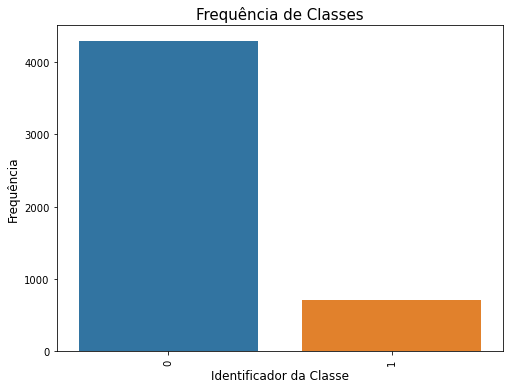

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x="churn", data=dados)
plt.ylabel('Frequência', fontsize=12)
plt.xlabel('Identificador da Classe', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequência de Classes", fontsize=15)
plt.show()

In [29]:
target_0 = len(dados[dados['churn'] == 0])
target_1 = len(dados[dados['churn'] == 1])
target_p = round(target_1/target_0,2)
print('Número de observações TARGET = 0 ', target_0)
print('Número de observações TARGET = 1 ', target_1)
print('Proporção TARGET_1/TARGET_0 ', target_p)

Número de observações TARGET = 0  4293
Número de observações TARGET = 1  707
Proporção TARGET_1/TARGET_0  0.16


In [30]:
df_1 = dados[dados['churn'] == 1]
df_0 = dados[dados['churn'] == 0]
print('df_1 e df_0 Shape: ',df_1.shape, df_0.shape)

df_1 e df_0 Shape:  (707, 20) (4293, 20)


In [31]:
from sklearn.utils import resample

# Upsample minority class
target_1_up = resample(df_1, 
                             replace=True,     # sample with replacement
                             n_samples=2500,   # to match majority class
                             random_state=123) # reproducible results

# Downsample majority class
target_0_down = resample(df_0, 
                             replace=False,    # sample without replacement
                             n_samples=2500,   # to match minority class
                             random_state=123) # reproducible results

In [32]:
dados = pd.concat([target_1_up, target_0_down],sort=False)
print('Dados Shape: ',dados.shape)

Dados Shape:  (5000, 20)


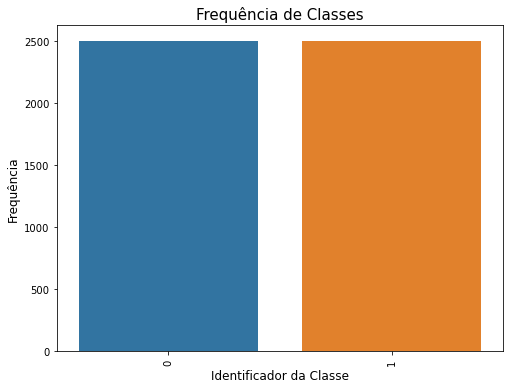

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(x="churn", data=dados)
plt.ylabel('Frequência', fontsize=12)
plt.xlabel('Identificador da Classe', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequência de Classes", fontsize=15)
plt.show()

------------------
### Dividir os dados em Treino e Teste

In [34]:
y = dados['churn'] 
X = dados.drop('churn', axis = 1) 

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [36]:
print('X_train e y_train [shape] e [type]: ', X_train.shape, type(X_train), y_train.shape, type(y_train))
print('X_test e y_test [shape] e [type]: ', X_test.shape, type(X_test), y_test.shape, type(y_test))

X_train e y_train [shape] e [type]:  (3750, 19) <class 'pandas.core.frame.DataFrame'> (3750,) <class 'pandas.core.series.Series'>
X_test e y_test [shape] e [type]:  (1250, 19) <class 'pandas.core.frame.DataFrame'> (1250,) <class 'pandas.core.series.Series'>


-------
### Seleção de Atributos

In [37]:
# Feature Importance
#from sklearn import datasets
#from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
import time

start_time = time.time()
# fit an Extra Trees model to the data
clf = ExtraTreesClassifier(n_estimators = 200, criterion ='entropy', max_features = 'auto')
clf.fit(X, y)
# display the relative importance of each attribute
feature_importances = clf.feature_importances_

tempo  = time.time() - start_time
print("\n--- %s seconds ---" % (round(tempo)))


--- 2 seconds ---


In [38]:
# lista o nome e a importancia de todas as features
# não é necessário executar esta celula ;-)

indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    colname = X.columns[indices[f]]
    print("%d. %s: feature %d (%f)" % (f + 1, colname, indices[f], feature_importances[indices[f]]))

Feature ranking:
1. number_customer_service_calls: feature 16 (0.130435)
2. total_day_charge: feature 6 (0.123205)
3. total_day_minutes: feature 4 (0.115427)
4. international_plan: feature 1 (0.068412)
5. total_eve_minutes: feature 7 (0.055016)
6. total_eve_charge: feature 9 (0.052634)
7. total_intl_calls: feature 14 (0.046289)
8. total_intl_minutes: feature 13 (0.040205)
9. total_intl_charge: feature 15 (0.040063)
10. total_night_charge: feature 12 (0.039236)
11. total_night_minutes: feature 10 (0.039206)
12. state_cat: feature 17 (0.037724)
13. account_length: feature 0 (0.036188)
14. total_day_calls: feature 5 (0.035778)
15. total_night_calls: feature 11 (0.035082)
16. total_eve_calls: feature 8 (0.032826)
17. area_code_cat: feature 18 (0.029230)
18. voice_mail_plan: feature 2 (0.023657)
19. number_vmail_messages: feature 3 (0.019385)


------------
### Correlação

In [39]:
dados2 = pd.concat([X_train, y_train], axis=1)

In [40]:
dados2.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,state_cat,area_code_cat,churn
676,49,0,0,0,260.9,88,44.35,174.2,103,14.81,262.8,98,11.83,10.6,4,2.86,1,48,0,0
1518,39,0,0,0,189.6,89,32.23,251.6,116,21.39,230.9,105,10.39,5.4,8,1.46,3,42,2,0
1396,140,1,1,27,188.9,124,32.11,160.9,102,13.68,197.7,100,8.90,11.5,5,3.11,4,20,1,0
995,94,0,0,0,190.6,108,32.40,152.3,95,12.95,144.7,97,6.51,7.5,5,2.03,1,33,2,0
212,82,0,1,24,155.2,131,26.38,244.5,106,20.78,122.4,68,5.51,10.7,3,2.89,1,38,1,0


<AxesSubplot:>

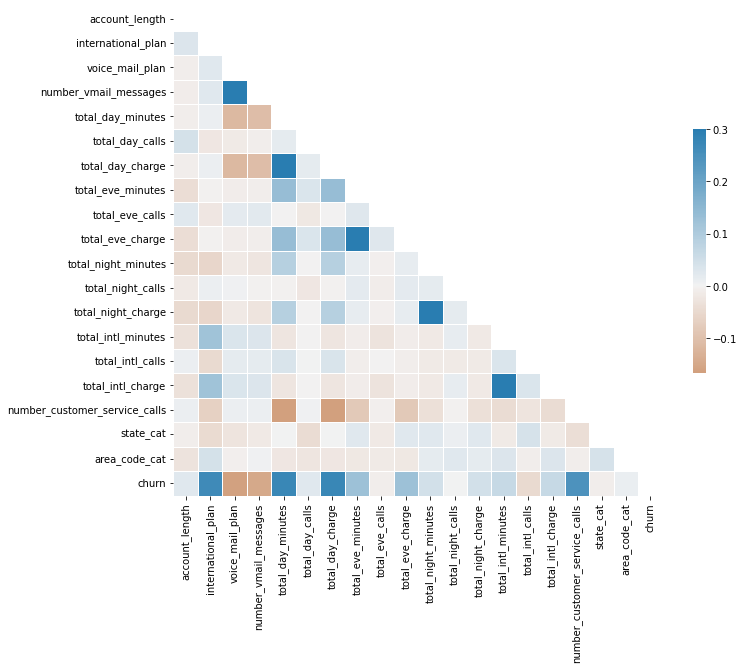

In [41]:
# Compute the correlation matrix
corr = dados2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = sns.diverging_palette(30, 600, s=90, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

https://adataanalyst.com/machine-learning/guide-for-linear-regression-using-python-part-2/

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_data = pd.DataFrame() 
vif_data["feature"] = dados2.columns 

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(dados2.values, i) 
                          for i in range(len(dados2.columns))] 
  
print(vif_data)

                          feature           VIF
0                  account_length  7.056697e+00
1              international_plan  1.367962e+00
2                 voice_mail_plan  1.749808e+01
3           number_vmail_messages  1.714952e+01
4               total_day_minutes  1.458779e+08
5                 total_day_calls  2.097704e+01
6                total_day_charge  1.458799e+08
7               total_eve_minutes  3.843398e+07
8                 total_eve_calls  2.209397e+01
9                total_eve_charge  3.843460e+07
10            total_night_minutes  1.063361e+07
11              total_night_calls  2.122766e+01
12             total_night_charge  1.063336e+07
13             total_intl_minutes  1.048776e+06
14               total_intl_calls  4.049393e+00
15              total_intl_charge  1.049145e+06
16  number_customer_service_calls  2.714318e+00
17                      state_cat  4.095631e+00
18                  area_code_cat  2.997998e+00
19                          churn  2.733

In [43]:
?variance_inflation_factor

Signature: variance_inflation_factor(exog, exog_idx)
Docstring:
variance inflation factor, VIF, for one exogenous variable

The variance inflation factor is a measure for the increase of the
variance of the parameter estimates if an additional variable, given by
exog_idx is added to the linear regression. It is a measure for
multicollinearity of the design matrix, exog.

One recommendation is that if VIF is greater than 5, then the explanatory
variable given by exog_idx is highly collinear with the other explanatory
variables, and the parameter estimates will have large standard errors
because of this.

Parameters
----------
exog : ndarray
    design matrix with all explanatory variables, as for example used in
    regression
exog_idx : int
    index of the exogenous variable in the columns of exog

Returns
-------
vif : float
    variance inflation factor

Notes
-----
This function does not save the auxiliary regression.

See Also
--------
xxx : class for regression diagnostics  TODO:

Feature ranking:
1. number_customer_service_calls: feature 16 (0.126208)
2. total_day_minutes: feature 4 (0.121851)
3. total_day_charge: feature 6 (0.118575)
4. international_plan: feature 1 (0.071614)
5. total_eve_charge: feature 9 (0.054645)
6. total_eve_minutes: feature 7 (0.052729)
7. total_intl_calls: feature 14 (0.045392)
8. total_night_minutes: feature 10 (0.040441)
9. total_intl_minutes: feature 13 (0.040180)
10. total_intl_charge: feature 15 (0.039956)
11. total_night_charge: feature 12 (0.038592)
12. state_cat: feature 17 (0.038166)
13. account_length: feature 0 (0.036596)
14. total_night_calls: feature 11 (0.035584)
15. total_day_calls: feature 5 (0.035529)
16. total_eve_calls: feature 8 (0.033922)
17. area_code_cat: feature 18 (0.028467)
18. voice_mail_plan: feature 2 (0.022386)
19. number_vmail_messages: feature 3 (0.019168)

Note que total_algo_minutes tem um forte correlacao com total_algo_charge - uma destas 
poderia ser removida

Feature chosen:
1. number_customer_service_calls: feature 16 (0.126208)
3. total_day_charge: feature 6 (0.118575)
4. international_plan: feature 1 (0.071614)
5. total_eve_charge: feature 9 (0.054645)
7. total_intl_calls: feature 14 (0.045392)
10. total_intl_charge: feature 15 (0.039956)
11. total_night_charge: feature 12 (0.038592)

In [44]:
features = [ 'number_customer_service_calls', 'total_day_charge', 'international_plan', 
            'total_eve_charge', 'total_intl_calls', 'total_intl_charge', 'total_night_charge','churn']

In [45]:
vif_data = pd.DataFrame() 
dados3 = dados2[features]
vif_data["feature"] = dados3.columns 

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(dados3.values, i) 
                          for i in range(len(dados3.columns))] 
  
print(vif_data)

                         feature        VIF
0  number_customer_service_calls   2.523325
1               total_day_charge  10.975234
2             international_plan   1.342358
3               total_eve_charge  13.149549
4               total_intl_calls   3.919751
5              total_intl_charge  11.567995
6             total_night_charge  12.946011
7                          churn   2.600318


In [46]:
features = [ 'number_customer_service_calls', 'total_day_charge', 
            'international_plan', 'total_intl_calls', 'churn']

In [47]:
vif_data = pd.DataFrame() 
dados3 = dados2[features]
vif_data["feature"] = dados3.columns 

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(dados3.values, i) 
                          for i in range(len(dados3.columns))] 
  
print(vif_data)

                         feature       VIF
0  number_customer_service_calls  2.227287
1               total_day_charge  4.667780
2             international_plan  1.290901
3               total_intl_calls  3.415136
4                          churn  2.587618


------
### Conclusão da Seleção de Features

Com base no ExtraTreesClassifier e na análise de variance inflation factor

Ficamos com estes aqui... 
Vamos ver se eles conseguem explicar de forma significativa a variação do target

'number_customer_service_calls', 
'total_day_charge', 
'international_plan', 
'total_intl_calls'


-----
### Distribuição

array([[<AxesSubplot:title={'center':'account_length'}>,
        <AxesSubplot:title={'center':'international_plan'}>,
        <AxesSubplot:title={'center':'voice_mail_plan'}>,
        <AxesSubplot:title={'center':'number_vmail_messages'}>],
       [<AxesSubplot:title={'center':'total_day_minutes'}>,
        <AxesSubplot:title={'center':'total_day_calls'}>,
        <AxesSubplot:title={'center':'total_day_charge'}>,
        <AxesSubplot:title={'center':'total_eve_minutes'}>],
       [<AxesSubplot:title={'center':'total_eve_calls'}>,
        <AxesSubplot:title={'center':'total_eve_charge'}>,
        <AxesSubplot:title={'center':'total_night_minutes'}>,
        <AxesSubplot:title={'center':'total_night_calls'}>],
       [<AxesSubplot:title={'center':'total_night_charge'}>,
        <AxesSubplot:title={'center':'total_intl_minutes'}>,
        <AxesSubplot:title={'center':'total_intl_calls'}>,
        <AxesSubplot:title={'center':'total_intl_charge'}>],
       [<AxesSubplot:title={'center':'n

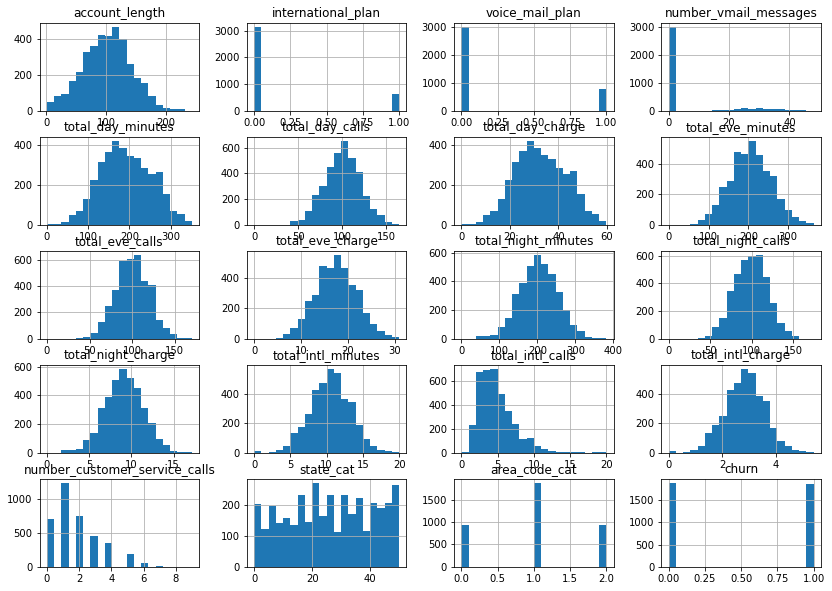

In [48]:
dados2.hist(bins=20, figsize=(14,10))

<AxesSubplot:>

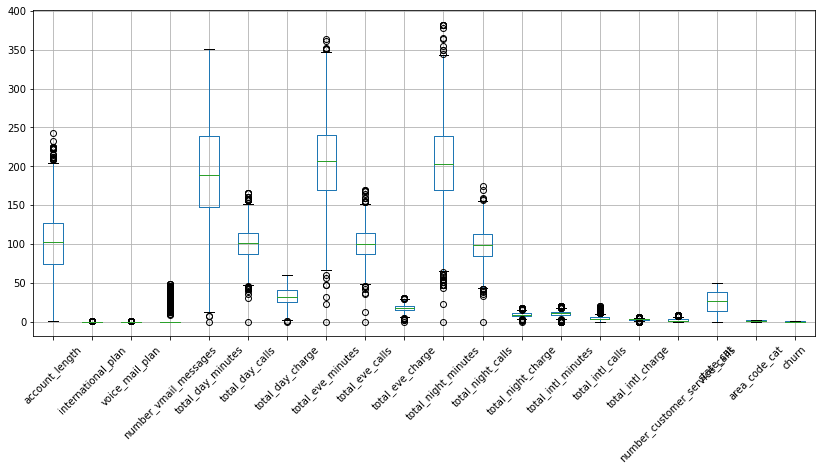

In [49]:
dados2.boxplot(figsize=(14,6),rot=45)

-----------------
### Divindo novamente os dados

In [50]:
y = dados3['churn'] 
X = dados3.drop('churn', axis = 1) 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [51]:
print('X_train e y_train [shape] e [type]: ', X_train.shape, type(X_train), y_train.shape, type(y_train))
print('X_test e y_test [shape] e [type]: ', X_test.shape, type(X_test), y_test.shape, type(y_test))

X_train e y_train [shape] e [type]:  (2812, 4) <class 'pandas.core.frame.DataFrame'> (2812,) <class 'pandas.core.series.Series'>
X_test e y_test [shape] e [type]:  (938, 4) <class 'pandas.core.frame.DataFrame'> (938,) <class 'pandas.core.series.Series'>


In [52]:
X_test.head()

,number_customer_service_calls,total_day_charge,international_plan,total_intl_calls
2594,1,58.70,1,8
1496,2,32.44,0,1
1374,1,36.43,0,5
467,1,28.97,0,4
1925,2,32.33,0,6


In [53]:
file_name = 'modelo/customers.csv'
X_test.to_csv(file_name, sep=',', encoding='utf-8', index=False)

------------
### LogisticRegression

In [54]:
from sklearn.linear_model import LogisticRegression
import time

start_time = time.time()
logreg = LogisticRegression(max_iter=5000, random_state=0).fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

tempo  = time.time() - start_time
print("\n--- %s seconds ---" % (round(tempo)))

Accuracy of logistic regression on test set: 0.75

--- 0 seconds ---


In [55]:
import pickle

logreg.fit(X_train, y_train)

filename = 'modelo/finalized_model.sav'
pickle.dump(logreg, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7452025586353944


------------
### Realizando previsoes com o modelo

In [56]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
customers = pd.read_csv("modelo/customers.csv")
pred = loaded_model.predict(customers)

https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

In [85]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
print('p_fpr, p_tpr : ',p_fpr, p_tpr)

auc_score = roc_auc_score(y_test, pred)
print('auc score',auc_score)


p_fpr, p_tpr :  [0. 1.] [0. 1.]
auc score 0.7455487050778408


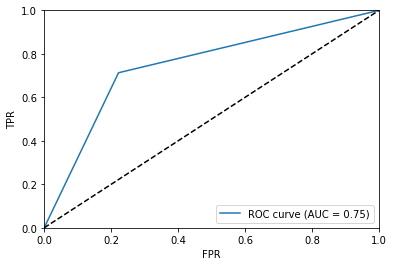

In [86]:
# https://colab.research.google.com/github/dannycab/MSU_REU_ML_course/blob/main/notebooks/day-4/Day_4-Multiplicity_of_Models.ipynb#scrollTo=5d942768-85f3-4328-a87c-0551c2626da9
fpr, tpr, thresholds = roc_curve(y_test, pred)

plt.figure()

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, pred))
plt.plot([0, 1], [0, 1], c='k', linestyle='--')

plt.axis([0, 1, 0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")

### LogisticRegression - Pipeline - GridSearchCV

In [ ]:
import warnings
warnings.filterwarnings('ignore') 

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import time

start_time = time.time()

logreg = LogisticRegression(max_iter=5000, random_state=0)

minmax = MinMaxScaler()
scaler = StandardScaler()
robust = RobustScaler() # muito demorado

# pipe = Pipeline(steps=[('robus', robust), ('logreg', logreg)])
pipe = Pipeline(steps=[('minmax', minmax), ('scaler', scaler), ('logreg', logreg)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
#param_grid = {
#    'logreg__penalty':('l1', 'l2', 'elasticnet', 'none'),
#    'logreg__solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
#    'logreg__C':[1, 3, 5]
#}


param_grid = [
    {
      'logreg__penalty': ('l2', 'none'),
      'logreg__solver': ('newton-cg', 'lbfgs', 'sag'),
    },
    {
      'logreg__penalty': ('l1', 'l2'),
      'logreg__solver': (['liblinear']),
      'logreg__C': [1, 3, 5]
    },
    {
      'logreg__penalty': ('l2', 'elasticnet'),
      'logreg__solver': (['saga']),
      'logreg__C': [1, 3, 5]
    }
]

search = GridSearchCV(pipe, param_grid, n_jobs=-1)

search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

tempo  = time.time() - start_time
print("\n--- %s seconds ---" % (round(tempo)))

# alguma mudança no LogistRegression
# ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.
# ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

------------
### AdaBoostClassifier

In [58]:
from sklearn.ensemble import AdaBoostClassifier
import time

start_time = time.time()

pipe = Pipeline([('minmax', MinMaxScaler()),('aboost', AdaBoostClassifier())])

params = {
    'aboost__n_estimators': [100, 200, 300], 
    'aboost__learning_rate': [0.2, 0.5, 1], 
}

grid = GridSearchCV(estimator=pipe,           
                  param_grid=params, 
                  cv=5,
                  return_train_score=True) # Turn on cv train scores

grid.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

tempo  = time.time() - start_time
print("\n--- %s seconds ---" % (round(tempo)))

Best parameter (CV score=0.808):
{'aboost__learning_rate': 0.2, 'aboost__n_estimators': 200}

--- 45 seconds ---


---------------------
### XGBoosting

In [78]:
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import time

start_time = time.time()
xgb_model = xgb.XGBClassifier(objective="binary:logistic", 
                              eval_metric = "logloss", 
                              random_state=42, 
                              label_encoder=False)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

tempo  = time.time() - start_time
print("\n--- %s seconds ---" % (round(tempo)))

[15:56:25] WARNING: ../src/learner.cc:576: 
Parameters: { "label_encoder" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[[411  53]
 [ 57 417]]
Accuracy: 88.27%

--- 1 seconds ---
